# LONG SHORT TERM MEMORY (LSTM)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("HeatMap_Dataset.xlsx", engine='openpyxl')

In [3]:
df.head()

,District,Year,Season,Crop,Area,Production,Yield,Soil_Type,Mean_Seasonal_Rainfall
0,Ajmer,1997,Kharif,Bajra,56600,30400.0,0.537102,"Sierozens, eastern part alluvial, west north w...",127.75825
1,Ajmer,1997,Kharif,Jowar,105900,34600.0,0.326723,"Sierozens, eastern part alluvial, west north w...",127.75825
2,Ajmer,1997,Rabi,Barley,24700,28900.0,1.170040,"Sierozens, eastern part alluvial, west north w...",16.10950
3,Ajmer,1997,Rabi,Rapeseed &Mustard,36700,25400.0,0.692098,"Sierozens, eastern part alluvial, west north w...",16.10950
4,Ajmer,1997,Rabi,Wheat,79300,144500.0,1.822194,"Sierozens, eastern part alluvial, west north w...",16.10950


In [4]:
df.isnull().sum()

District                   0
Year                       0
Season                     0
Crop                       0
Area                       0
Production                 9
Yield                     20
Soil_Type                  0
Mean_Seasonal_Rainfall     0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

District                  0
Year                      0
Season                    0
Crop                      0
Area                      0
Production                0
Yield                     0
Soil_Type                 0
Mean_Seasonal_Rainfall    0
dtype: int64

In [7]:
df1 = df['Soil_Type'].str.get_dummies(sep=',')

In [8]:
df1.head()

,Predominantly reddish medium texture,Red desert soils,Sandy loam,Soil are lithosolsat foot hills & alluvials in plains,brown soils,clay loam,coarse sand in texture some places calcareous,deep soils in valleys,eastern part alluvial,foot hills,...,west north west lithosols,Alluvial deposites calcareous,Alluvial prone to water logging,Black of alluvial origin,Desert soils and sand dunes aeolian soil,Predominantly reddish medium texture,Red desert soils,Sandy loam,Sierozens,Soil are lithosolsat foot hills & alluvials in plains
0,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,1,0


In [9]:
frames = [df,df1]
df = pd.concat(frames,axis=1)
df.head()

,District,Year,Season,Crop,Area,Production,Yield,Soil_Type,Mean_Seasonal_Rainfall,Predominantly reddish medium texture,...,west north west lithosols,Alluvial deposites calcareous,Alluvial prone to water logging,Black of alluvial origin,Desert soils and sand dunes aeolian soil,Predominantly reddish medium texture,Red desert soils,Sandy loam,Sierozens,Soil are lithosolsat foot hills & alluvials in plains
0,Ajmer,1997,Kharif,Bajra,56600,30400.0,0.537102,"Sierozens, eastern part alluvial, west north w...",127.75825,0,...,1,0,0,0,0,0,0,0,1,0
1,Ajmer,1997,Kharif,Jowar,105900,34600.0,0.326723,"Sierozens, eastern part alluvial, west north w...",127.75825,0,...,1,0,0,0,0,0,0,0,1,0
2,Ajmer,1997,Rabi,Barley,24700,28900.0,1.170040,"Sierozens, eastern part alluvial, west north w...",16.10950,0,...,1,0,0,0,0,0,0,0,1,0
3,Ajmer,1997,Rabi,Rapeseed &Mustard,36700,25400.0,0.692098,"Sierozens, eastern part alluvial, west north w...",16.10950,0,...,1,0,0,0,0,0,0,0,1,0
4,Ajmer,1997,Rabi,Wheat,79300,144500.0,1.822194,"Sierozens, eastern part alluvial, west north w...",16.10950,0,...,1,0,0,0,0,0,0,0,1,0


In [10]:
df = df.drop("Soil_Type",axis=1)

In [11]:
df.head()

,District,Year,Season,Crop,Area,Production,Yield,Mean_Seasonal_Rainfall,Predominantly reddish medium texture,Red desert soils,...,west north west lithosols,Alluvial deposites calcareous,Alluvial prone to water logging,Black of alluvial origin,Desert soils and sand dunes aeolian soil,Predominantly reddish medium texture,Red desert soils,Sandy loam,Sierozens,Soil are lithosolsat foot hills & alluvials in plains
0,Ajmer,1997,Kharif,Bajra,56600,30400.0,0.537102,127.75825,0,0,...,1,0,0,0,0,0,0,0,1,0
1,Ajmer,1997,Kharif,Jowar,105900,34600.0,0.326723,127.75825,0,0,...,1,0,0,0,0,0,0,0,1,0
2,Ajmer,1997,Rabi,Barley,24700,28900.0,1.170040,16.10950,0,0,...,1,0,0,0,0,0,0,0,1,0
3,Ajmer,1997,Rabi,Rapeseed &Mustard,36700,25400.0,0.692098,16.10950,0,0,...,1,0,0,0,0,0,0,0,1,0
4,Ajmer,1997,Rabi,Wheat,79300,144500.0,1.822194,16.10950,0,0,...,1,0,0,0,0,0,0,0,1,0


In [12]:
df = pd.get_dummies(df)

In [13]:
df.head()

,Year,Area,Production,Yield,Mean_Seasonal_Rainfall,Predominantly reddish medium texture,Red desert soils,Sandy loam,Soil are lithosolsat foot hills & alluvials in plains,brown soils,...,District_Ваran,District_Наnumangarh,District_Раli,Season_Kharif,Season_Rabi,Crop_Bajra,Crop_Barley,Crop_Jowar,Crop_Rapeseed &Mustard,Crop_Wheat
0,1997,56600,30400.0,0.537102,127.75825,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,1997,105900,34600.0,0.326723,127.75825,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1997,24700,28900.0,1.170040,16.10950,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
3,1997,36700,25400.0,0.692098,16.10950,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,1997,79300,144500.0,1.822194,16.10950,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1


## USING ALL PARAMETERS

In [14]:
x = np.array(df.drop("Yield",axis=1))
y = np.array(df[["Yield"]])

In [15]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)
y = std.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.01, random_state=71)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (3591, 70)
x_test : (37, 70)
y_train : (3591, 1)
y_test : (37, 1)


In [17]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import math

In [19]:
reg = Sequential()

reg.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50, return_sequences=True))
reg.add(Dropout(0.2))

reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

reg.add(Dense(units=1))

reg.compile(optimizer='adam', loss='mean_squared_error')

reg.fit(x_train,y_train,epochs=50,batch_size=64)

Epoch 1/50
57/57 [==============================] - 10s 181ms/step - loss: 1.0078
Epoch 2/50
57/57 [==============================] - 10s 179ms/step - loss: 1.0071
Epoch 3/50
57/57 [==============================] - 12s 206ms/step - loss: 1.0092
Epoch 4/50
57/57 [==============================] - 13s 230ms/step - loss: 1.0080
Epoch 5/50
57/57 [==============================] - 13s 228ms/step - loss: 1.0063
Epoch 6/50
57/57 [==============================] - 10s 180ms/step - loss: 1.0044
Epoch 7/50
57/57 [==============================] - 9s 164ms/step - loss: 1.0050
Epoch 8/50
57/57 [==============================] - 12s 203ms/step - loss: 1.0032
Epoch 9/50
57/57 [==============================] - 10s 174ms/step - loss: 0.9977
Epoch 10/50
57/57 [==============================] - 10s 180ms/step - loss: 1.0086
Epoch 11/50
57/57 [==============================] - 10s 181ms/step - loss: 1.0013
Epoch 12/50
57/57 [==============================] - 9s 165ms/step - loss: 0.9989
Epoch 13/50
57/

In [20]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
y_pred = reg.predict(x_test)
y_pred = std.inverse_transform(y_pred)
y_test = std.inverse_transform(y_test)

In [21]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y_test, y_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.48569142342050614


In [22]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_pred)

0.40382534549934435

In [23]:
from sklearn.metrics import r2_score
r = r2_score(y_test,y_pred)
r

0.7731194397385898

## USING SELECTED PARAMETERS

In [24]:
cols = ['Yield',
       ' Predominantly reddish medium texture', ' Red desert soils',
       ' Sandy loam', ' Soil are lithosolsat foot hills & alluvials in plains',
       ' brown soils', ' clay loam',
       ' coarse sand in texture some places calcareous',
       ' deep soils in valleys', ' eastern part alluvial', ' foot hills',
       ' groundwater salinity', ' high soluble salts & exchangeable sodium',
       ' loamycoarse in texture & calcareous',
       ' nature of recently alluvial calcareous has been observed',
       ' sallow depth red soils in depressions', ' shallow on hills',
       ' well drained calcareous', ' west north west lithosols',
       'Alluvial deposites calcareous', 'Alluvial prone to water logging',
       'Black of alluvial origin', 'Desert soils and sand dunes aeolian soil',
       'Predominantly reddish medium texture', 'Red desert soils',
       'Sandy loam', 'Sierozens',
       'Soil are lithosolsat foot hills & alluvials in plains',
       'Mean_Seasonal_Rainfall']

x1 = np.array(df.drop(cols,axis=1))
y1 = np.array(df[["Yield"]])

In [25]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x1 = std.fit_transform(x1)
y1 = std.fit_transform(y1)

In [26]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size = 0.01 , random_state=71)
print(x1_train.shape)
print(y1_train.shape)
print(x1_test.shape)
print(y1_test.shape)

(3591, 42)
(3591, 1)
(37, 42)
(37, 1)


In [27]:
x1_train = np.reshape(x1_train,(x1_train.shape[0],x1_train.shape[1],1))

In [28]:
reg1 = Sequential()

reg1.add(LSTM(units=50, return_sequences=True, input_shape=(x1_train.shape[1],1)))
reg1.add(Dropout(0.2))

reg1.add(LSTM(units=50, return_sequences=True))
reg1.add(Dropout(0.2))

reg1.add(LSTM(units=50, return_sequences=True))
reg1.add(Dropout(0.2))

reg1.add(LSTM(units=50))
reg1.add(Dropout(0.2))

reg1.add(Dense(units=1))

reg1.compile(optimizer='adam', loss='mean_squared_error')

reg1.fit(x1_train,y1_train,epochs=50,batch_size=64)

Epoch 1/50
57/57 [==============================] - 6s 111ms/step - loss: 1.0081
Epoch 2/50
57/57 [==============================] - 6s 103ms/step - loss: 1.0088
Epoch 3/50
57/57 [==============================] - 6s 101ms/step - loss: 1.0067
Epoch 4/50
57/57 [==============================] - 6s 107ms/step - loss: 1.0074
Epoch 5/50
57/57 [==============================] - 6s 105ms/step - loss: 1.0074
Epoch 6/50
57/57 [==============================] - 6s 109ms/step - loss: 1.0065
Epoch 7/50
57/57 [==============================] - 6s 103ms/step - loss: 1.0005
Epoch 8/50
57/57 [==============================] - 6s 97ms/step - loss: 1.0078
Epoch 9/50
57/57 [==============================] - 6s 113ms/step - loss: 1.0023
Epoch 10/50
57/57 [==============================] - 6s 102ms/step - loss: 1.0002
Epoch 11/50
57/57 [==============================] - 6s 100ms/step - loss: 1.0047
Epoch 12/50
57/57 [==============================] - 7s 117ms/step - loss: 0.9991
Epoch 13/50
57/57 [=======

In [29]:
x1_test = np.reshape(x1_test, (x1_test.shape[0],x1_test.shape[1],1))
y1_pred = reg.predict(x1_test)
y1_pred = std.inverse_transform(y1_pred)
y1_test = std.inverse_transform(y1_test)

In [30]:
from sklearn.metrics import mean_squared_error
import math
 
MSE = mean_squared_error(y1_test, y1_pred)
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.48683427076780483


In [31]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y1_test,y1_pred)

0.4047155005956562

In [32]:
from sklearn.metrics import r2_score
r = r2_score(y1_test,y1_pred)
r

0.7720504692254079

## PERFORMANCE COMPARISON PLOTS

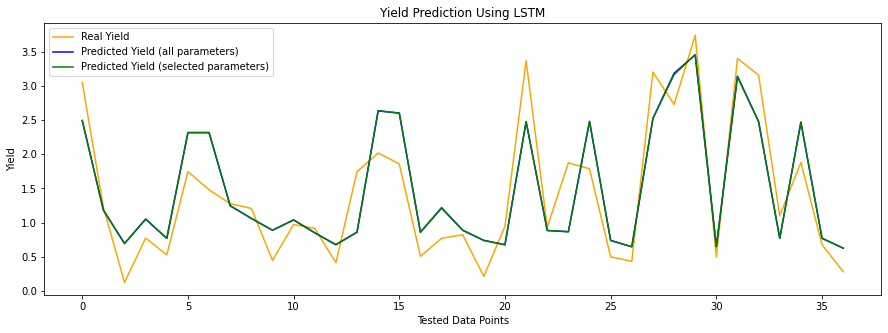

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.plot(y_test, color='orange',label='Real Yield')
plt.plot(y_pred, color='blue',label='Predicted Yield (all parameters)')
plt.plot(y1_pred, color='green',label='Predicted Yield (selected parameters)')
plt.title('Yield Prediction Using LSTM')
plt.xlabel("Tested Data Points")
plt.ylabel('Yield')
plt.legend()
plt.show()